## Imports

In [1]:
# Navigate to appropriate directory
import os
while os.path.split(os.getcwd())[1] != "data-challenge-kernel-methods":
    os.chdir("..")
    if os.getcwd() == "/":
        raise ValueError()

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from time import time
from tqdm import tqdm
import pickle
import networkx as nx

from molecules import Molecule

## Load training data

In [2]:
with open("data/training_data.pkl", "rb") as file:
    training_data = pickle.load(file)

with open("data/training_labels.pkl", "rb") as file:
    training_labels = pickle.load(file)


## Explore training data

In [3]:
len(training_data)

6000

In [4]:
type(training_data[0])

networkx.classes.graph.Graph

In [5]:
set(training_labels)

{0, 1}

## Convert training data to Molecule type

In [6]:
training_data = [Molecule(graph) for graph in training_data]

### Draw database

Index: 0 Label: 0


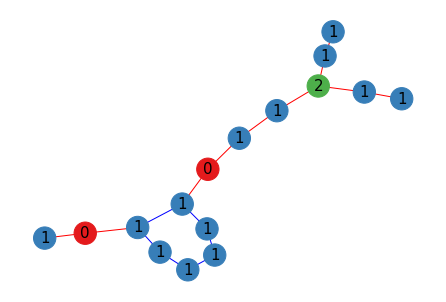

Index: 1 Label: 0


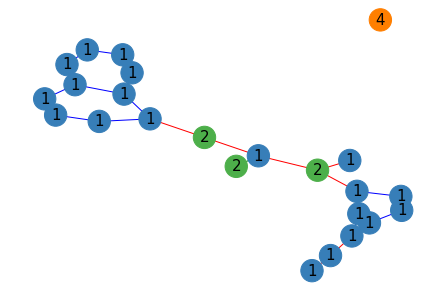

Index: 2 Label: 0


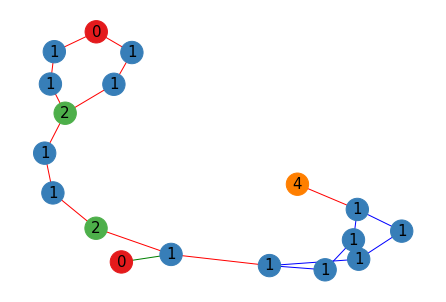

Index: 3 Label: 0


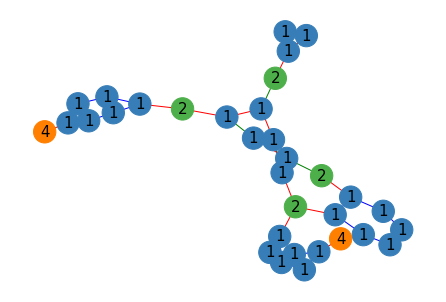

Index: 4 Label: 1


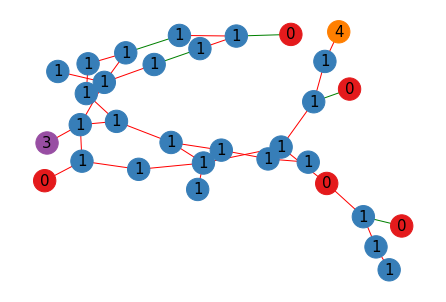

Index: 5 Label: 0


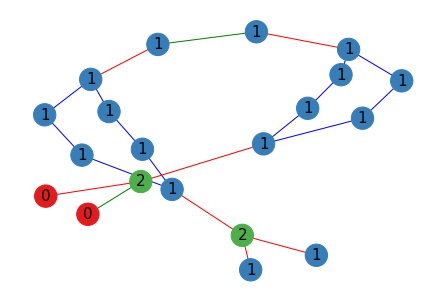

Index: 6 Label: 0


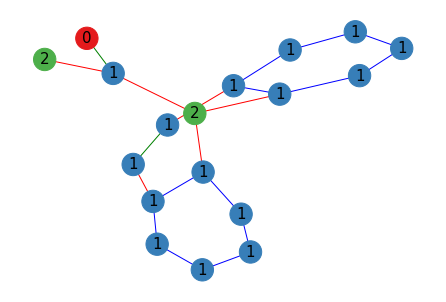

Index: 7 Label: 0


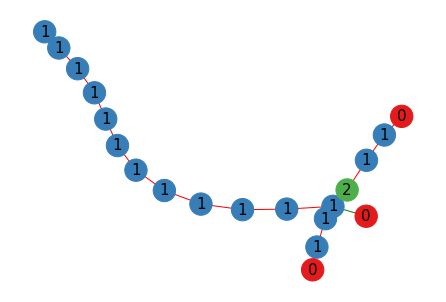

Index: 8 Label: 0


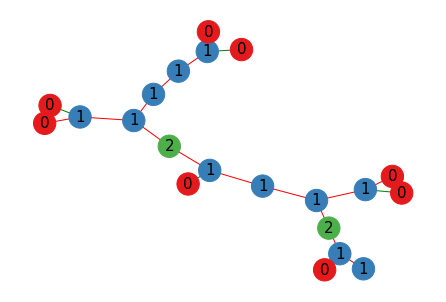

Index: 9 Label: 0


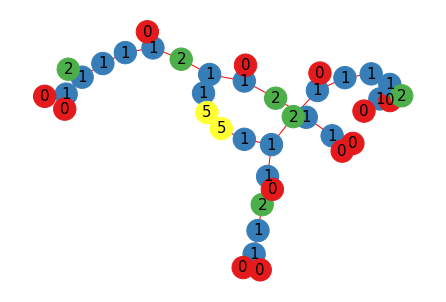

Index: 10 Label: 0


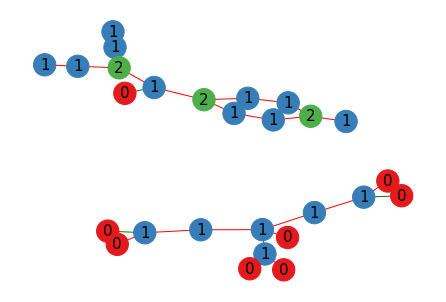

Index: 11 Label: 0


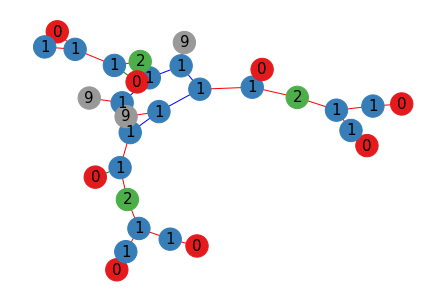

Index: 12 Label: 0


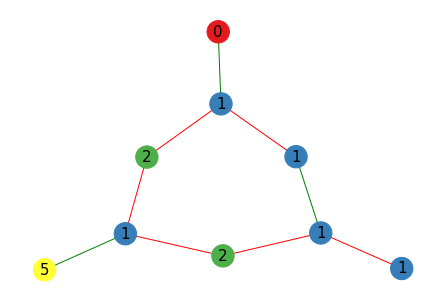

Index: 13 Label: 0


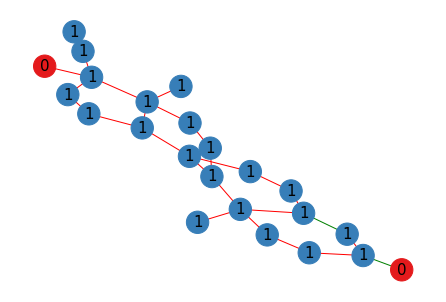

Index: 14 Label: 1


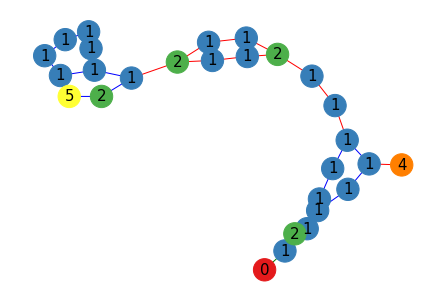

Index: 15 Label: 0


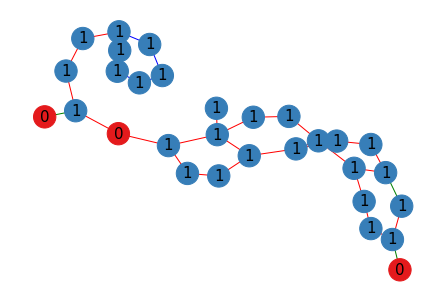

Index: 16 Label: 0


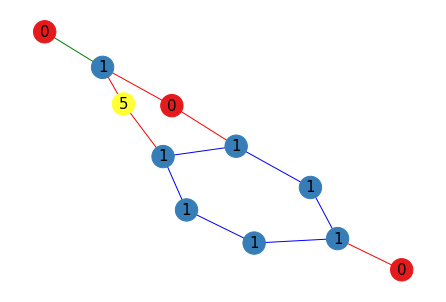

Index: 17 Label: 1


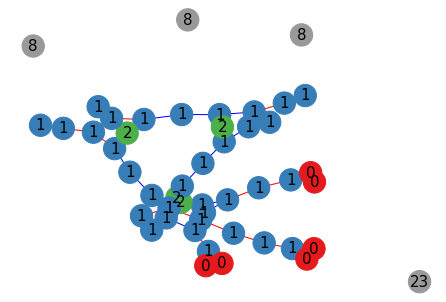

Index: 18 Label: 0


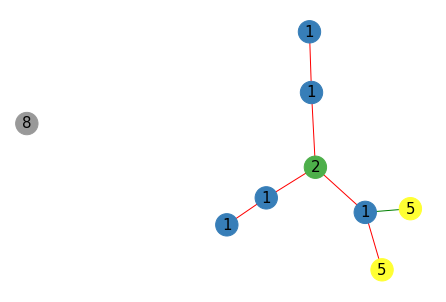

Index: 19 Label: 1


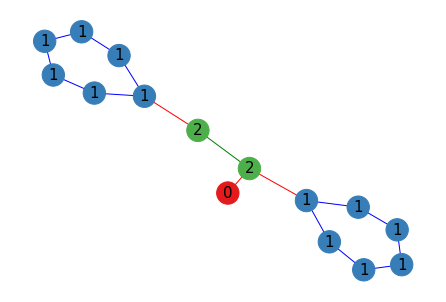

In [7]:
for i in range(20):
    print("Index:", i, "Label:", training_labels[i])
    training_data[i].plot()

### Statistics on node labels

In [8]:
graph = training_data[0]
list(graph.nodes(data=True))  # data=True means that we want to get the node labels

[(0, {'labels': [1]}),
 (1, {'labels': [1]}),
 (2, {'labels': [2]}),
 (3, {'labels': [0]}),
 (4, {'labels': [0]}),
 (5, {'labels': [1]}),
 (6, {'labels': [1]}),
 (7, {'labels': [1]}),
 (8, {'labels': [1]}),
 (9, {'labels': [1]}),
 (10, {'labels': [1]}),
 (11, {'labels': [1]}),
 (12, {'labels': [1]}),
 (13, {'labels': [1]}),
 (14, {'labels': [1]}),
 (15, {'labels': [1]})]

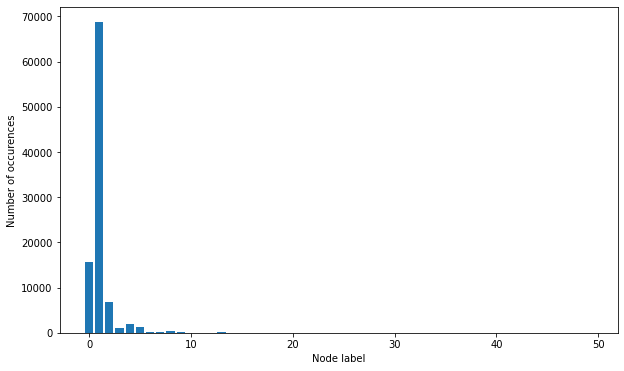

In [9]:
def get_labels(molecule):
    """Return the list of all labels of the nodes of a molecule (without specific order)."""
    return [node[1]["labels"][0] for node in molecule.nodes(data=True)]

# concatenate all node labels of training data
labels = sum([get_labels(mol) for mol in training_data], [])

# count occurences of each label
bc = np.bincount(labels)

# plot number of occurences
plt.figure(figsize=(10, 6))
plt.bar(np.arange(bc.shape[0]), bc)
plt.xlabel("Node label")
plt.ylabel("Number of occurences")
plt.show()

In [10]:
np.where(bc == 0)[0]

array([10, 20, 29])

The database does not contain any node with label 10, 20 or 29.

In [11]:
np.bincount(training_labels)

array([5445,  555])

The database contains much more nodes with label 0 than 1.

### Compare distributions of node labels for general molecules and molecules with label 1

In [12]:
p_idx = list(np.where(training_labels == 1)[0])

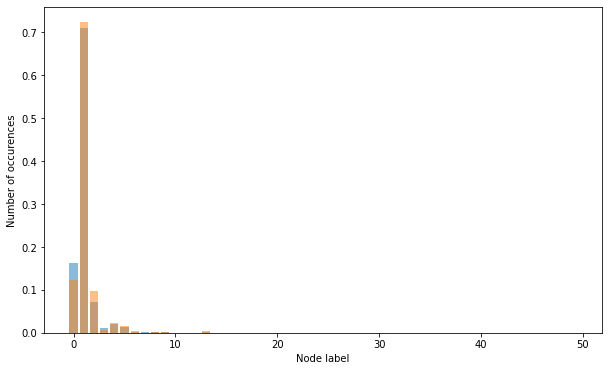

In [13]:
# concatenate all node labels of training data
labels = sum([get_labels(mol) for mol in training_data], [])
labels_p = sum([get_labels(training_data[i]) for i in p_idx], [])

# count occurences of each label
bc = np.bincount(labels)
bc_p = np.bincount(labels_p)

# plot number of occurences
plt.figure(figsize=(10, 6))
plt.bar(np.arange(bc.shape[0]), bc / np.sum(bc), alpha=0.5)
plt.bar(np.arange(bc_p.shape[0]), bc_p / np.sum(bc_p), alpha=0.5)
plt.xlabel("Node label")
plt.ylabel("Number of occurences")
plt.show()

Both types of molecules have approximately the same distributions of node labels.